# Gradient Descent vs. Newton's Method

In this notebook, we will analyze how first and second order descent methods (gradient descent and Newton's method respectively) act on different functions.

In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_plt_lim(x_array, func):
    x_min, x_max = np.min(x_array[:,0]), np.max(x_array[:,0])
    y_min, y_max = np.min(x_array[:,1]), np.max(x_array[:,1])
    
    x = np.linspace((x_min-0.1) *1.01, (x_max+0.1) *1.01)
    y = np.linspace((y_min-0.1) *1.01, (y_max+0.1) *1.01)
    xx, yy = np.meshgrid(x, y)
    z = func([xx, yy])
    
    return x, y, z

def visualize(x_array, func, watch_path=False):
    x_array = np.array(x_array)
    x, y, z = get_plt_lim(x_array, func)
    
    if watch_path:
        for i in np.arange(len(x_array)):
            plt.clf()
            plt.scatter(x_array[:i,0], x_array[:i,1], s = 5, c="red")
            plt.plot(x_array[:i,0],x_array[:i,1], 'o-', zorder=2, c="red")
            plt.contourf(x, y, z)
            plt.colorbar()
            plt.xlabel('x_1')
            plt.ylabel('x_2')
            display.clear_output(wait=True)
            display.display(plt.gcf())
    else:
        plt.scatter(x_array[:,0], x_array[:,1], s = 5, c="red")
        plt.plot(x_array[:,0],x_array[:,1], 'o-', zorder=2, c="red")
        plt.contourf(x, y, z)
        plt.colorbar()
        plt.xlabel('x_1')
        plt.ylabel('x_2')
        plt.show()

def visualize_comparison(x_grad, x_newton, func, watch_path=False):
    
    x_grad = np.array(x_grad)
    grad_x, grad_y, grad_z = get_plt_lim(x_grad, func)
    
    x_newton = np.array(x_newton)
    newton_x, newton_y, newton_z = get_plt_lim(x_grad, func)
    
    if watch_path:
        for i in np.arange(np.max([len(x_grad), len(x_newton)])):
            plt.clf()
                           
            plt.scatter(x_grad[:i,0], x_grad[:i,1], s = 5, c="red")
            plt.plot(x_grad[:i,0],x_grad[:i,1], 'o-', zorder=2,  label = 'Gradient Descent', c="red")   
                           
            plt.scatter(x_newton[:i,0], x_newton[:i,1], s = 5, c="orange")
            plt.plot(x_newton[:i,0],x_newton[:i,1], 'o-', zorder=2,  label = "Newton's method", c="orange") 
                   
            plt.contourf(grad_x, grad_y, grad_z)
            plt.colorbar()
            plt.xlabel('x_1')
            plt.ylabel('x_2')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            
    else:
    
        plt.scatter(x_grad[:,0], x_grad[:,1], s = 5, c="red")
        plt.plot(x_grad[:,0],x_grad[:,1], 'o-', zorder=2,  label = 'Gradient Descent', c="red")   

        plt.scatter(x_newton[:,0], x_newton[:,1], s = 5, c="orange")
        plt.plot(x_newton[:,0],x_newton[:,1], 'o-', zorder=2,  label = "Newton's method", c="orange") 
    
        plt.contourf(grad_x, grad_y, grad_z)
        plt.colorbar()
        plt.xlabel('x_1')
        plt.ylabel('x_2')
        plt.legend()
        plt.show()

# 0. Implementing Descent Methods

In this part, you will need to implement gradient descent and Newton's method. The appropriate parameters are given for each function, and it is your responsibility to return the "path" that it takes via a list of $[x_0, x_1, \dots, x_k]$, in addition to the number of iterations it took to either converge or not
. 

Note that, due to constraints imposed by working with floats, it is rare that we will perfectly converge (i.e. reach an $x^*$ such that it doesn't change). Because of this, we introduce a parameter __eps__ that will act as a threshold. If your next guess isn't too far from your previous guess, you can assume that we have converged. The smaller __eps__ is, the more accurate our guess.

In [2]:
# Optimization algorithms

# Gradient descent (first order method)
def gradient_descent(gradient, x, stepsize, eps = 1e-6, max_iters = 100):
    
    x_array = [x]
    num_iters =1
    # Your code here
    #####
    
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize*gradient(x)
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps: #We stop if the change in x is below a certain threshold
            break
        num_iters += 1
        prev_x = x
    
    #####
    return x_array, num_iters

# Netwon's method (second order method)
def Newton(gradient, Hessian, x,  stepsize=1.0, eps = 1e-6, max_iters = 100):
    # Your code here
    x_array = [x]
    num_iters = 1
    # Your code here
    #####
    
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize* np.matmul(np.linalg.inv(Hessian(x)),gradient(x))
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps:  # We stop if the change in x is below a certain threshold
            num_iters -= 1
            break
        num_iters += 1
        prev_x = x
    #####
    
    return x_array, num_iters

# 1. Minimizing a quadratic
Consider the following unconstrained convex optimization problem,
\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (32x_1^2 + x_2^2 \right)
\end{aligned}

Graphically, this is a parabaloid which grows much faster in the $x\; (x_1)$ direction than the $y\; (x_2)$ direction. Clearly, the optimal value of the problem is $0$ and $x_1^* = x_2^*= 0$.

## 1a. Using gradient descent

For this part of the question, it is useful to remember a fact proved in Problem 4 of Homework 6. Specifically, the condition for convergence.

### TODO: Complete the function below to return the gradient computed at $x$ for the problem above.

<span style="color:red">Solution:
We have $x_{k+1} = x_k - \eta \nabla f(x_k)$.
In our case we have $\nabla  f(x_k) = \begin{bmatrix} 32 x_1 \\x_2\end{bmatrix}$, where $x_1 = x_{k}[0]$ and $x_2 = x_{k}[1]$ denote the first and the second component of the vector $x$ respectively.

In [3]:
def gradient(x):
    '''Return gradient at x'''
    # TODO: Your code here
    grad  = np.array([32*x[0], x[1]]).astype('float')
    return grad

def f(x):
    '''Return f(x)'''
    fx = 16*x[0]**2 + 0.5*x[1]**2
    return fx

### Gradient descent in action
Suppose you start with $x_0 = \begin{bmatrix} 0.1 \\ 1\end{bmatrix}$. 

### TODO: Run gradient descent for the following stepsizes and compare the paths traced by $x_k$:
1. $\eta = \frac{2}{31.9}$
2. $\eta = \frac{2}{35}$
3. $\eta = \frac{2}{128}$

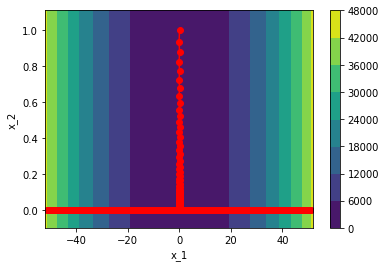

Stepsize = 0.06269592476489029, Num iterations 1000, Final x: [-5.14795804e+01  8.10260676e-29], Final objective value: 42402.3552


In [4]:
eta = 2/31.9
x0 = np.array([0.1,1])

x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)

# If you want to watch the descent live, set watch_path=True
# WARNING: For a descent that diverges, this will take REALLY long.
visualize(x_array, f, watch_path=False)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### TODO: Did it converge? Why or why not? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">First note that we can write the objective as $\frac{1}{2}x^\top Q x$ where $Q = \begin{bmatrix}32 & 0 \\0 & 1 \end{bmatrix}$, according to the standard form of a convex QP. Note that the largest eigenvalue of $Q$ is given by $\lambda_{max}(Q) = 32$. 
Here the stepsize is larger than the maximum stepsize for convergence $\left(\frac{2}{\lambda_{max}(Q)}\right)$ (result proved in Homework 6) and thus the algorithm diverges. </span>

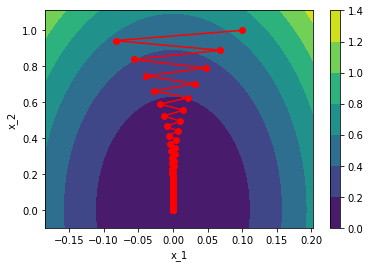

Stepsize = 0.05714285714285714, Num iterations 188, Final x: [4.42620238e-17 1.56974229e-05], Final objective value: 0.0


In [5]:
eta = 2/35

x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)

visualize(x_array, f, watch_path=False)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### TODO: Did it converge? Why or why not? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">Here the stepsize is not too large and thus the algorithm converges (in around 200 iterations). We can see that the $x_1$ quickly converges to 0 but convergence in $x_2$ is slow. 

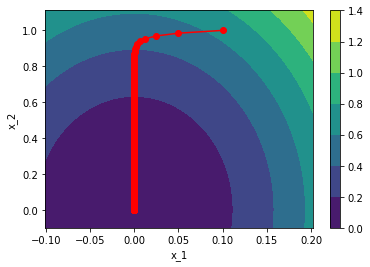

Stepsize = 0.015625, Num iterations 615, Final x: [7.35449178e-187 6.21947768e-005], Final objective value: 0.0


In [6]:
eta= 2/128

x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)
x_grad1 = x_array

visualize(x_array, f, watch_path=False)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### TODO: Did it converge? Why or why not? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">Here the stepsize is even smaller and thus the algorithm converges in around 600 iterations. Again we can see that the $x_1$ quickly converges to 0 but convergence in $x_2$ is slow. 

## 1b. Using Newton's method
Next we will use Newton's method to see if convergence is faster. 
### TODO: Complete the function below to return the Hessian computed at $x$ for the problem above.
<span style="color:red">Solution:
We have $x_{k+1} = x_{k} - \eta (\nabla ^2 f(x_k))^{-1} \nabla f(x_k)$.<BR>
Here,
$$\begin{align}
    \nabla  f(x_k) &= \begin{bmatrix}32 x_1 \\ x_2\end{bmatrix},\\
    \nabla^2 f(x_k) &= \begin{bmatrix}32 & 0 \\ 0  & 1 \end{bmatrix}.
\end{align}$$

In [7]:
def Hessian(x):
    '''Return Hessian at x'''
    # TODO: Your code here
    H = np.array([[32, 0], [0, 1]]).astype('float')
    return H

### Newton's method in action
Suppose you start with $x_0 = \begin{bmatrix}0.1 \\ 1\end{bmatrix}$. 
### TODO: Run Newton's method for the following stepsizes and compare the paths traced by $x_k$:
1. $\eta = 2.2$
2. $\eta =1$
3. $\eta = 0.5$

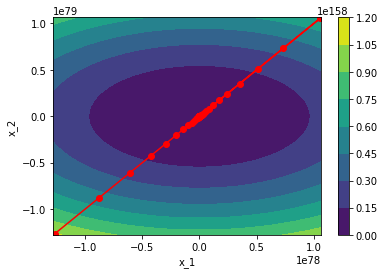

Stepsize = 2.2, Num iterations 1000, Final x: [-1.26492507e+78 -1.26492507e+79], Final objective value: 1.056023392788717e+158


In [8]:
eta = 2.2

x0 = np.array([0.1,1])
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)

visualize(x_array, f, watch_path=False)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### TODO: Did it converge? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">Though we have not covered explicit form for the largest allowed stepsize for Newton's method, we observe that for this problem, the stepsize of 2.2 is too large and the algorithm diverges. 

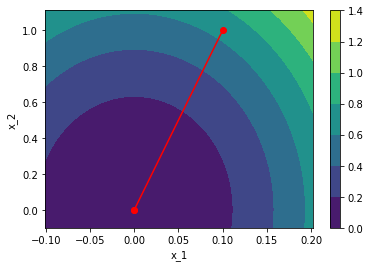

Stepsize = 1.0, Num iterations 1, Final x: [0. 0.], Final objective value: 0.0


In [9]:
x0 = np.array([0.1,1])
eta = 1.0
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)

visualize(x_array, f, watch_path=False)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### TODO: Did it converge? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">Using a stepsize of 1, the algorithm converges in one iteration! This is because Newton's method acts here exactly how gradient descent would act when descending on a line! A second-order method on a second-order function is just as efficient (in terms of number of iterations) as a first-order method on a first-order function. Later we will see that this is not always true when the objective is not quadratic. 

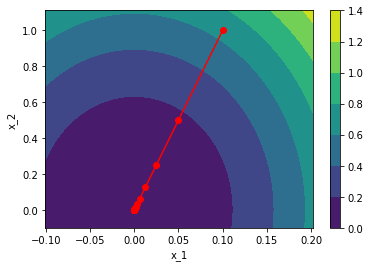

Stepsize = 0.5, Num iterations 19, Final x: [9.53674316e-08 9.53674316e-07], Final objective value: 0.0


In [10]:
x0 = np.array([0.1,1])
eta = 0.5
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)

visualize(x_array, f, watch_path=False)
x_newton1 = x_array

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### TODO: Did it converge? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">Using a stepsize of 0.5, the algorithm coverges in around 20 iterations. 

### 1c. Compare the paths taken by gradient descent with stepsize $\frac{2}{128}$ and Newton's method with stepsize $\frac{1}{2}$

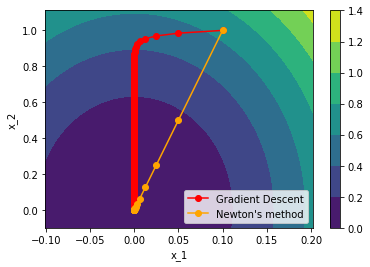

In [11]:
#Solution
visualize_comparison(x_grad1, x_newton1, f, watch_path=False)

### TODO: Compare the methods. How did they differ in their descent paths? Why do you think that is?

<span style="color:red">We can see that when using Newton's method, the trajectory follows a straight line joining the initial point to the optimal point but this is not the case when using gradient descent. (This is true since our objective is quadratic, but later we will see that, for non-quadratic objective functions, even Newton method's will not follow a straight line trajectory from initial point to optimal point).

## 2. Minimizing a non-quadratic objective
Next we consider a problem that involves minimization of an objective function that is not quadratic,

\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (10x_1^2 + x_2^2 \right) +  5\log(1 + e^{-x_1 -x_2})
\end{aligned}

### TODO: Complete the functions below to return the gradient and Hessian computed at $x$ for the problem above.

<span style="color:red">Solution:    
The gradient and Hessian are
$$
\begin{align}
\nabla f &= \begin{bmatrix}10x_1 - \frac{5}{1+t} \\ x_2 - \frac{5}{1+t}\end{bmatrix} \\
\nabla^2 f &= \begin{bmatrix}10 + \frac{5t}{(1 + t)^2} & \frac{5t}{(1 + t)^2} \\ \frac{5t}{(1 + t)^2} & 1 + \frac{5t}{(1 + t)^2}\end{bmatrix} \\
t &= e^{x_1 + x_2}
\end{align}
$$

In [12]:
def f2(x):
    return 0.5*(10*x[0]**2 + x[1]**2) + 5 * np.log(1 + np.exp(-x[0] - x[1]))

def gradient2(x):
    '''Return gradient at x'''
    # TODO: Your code here
    t = np.exp(x[0] + x[1])
    grad  = np.array([10*x[0] - 5/(t + 1), x[1] - 5/(t + 1)]).astype('float')
    return grad

def Hessian2(x):
    '''Return Hessian at x'''
    # TODO: Your code here
    t = np.exp(x[0] + x[1])
    z = 5*t / (1 + t)**2
    H_00 = 10 + z
    H_11 = 1 + z
    H_01 = z
    H_10 = z
    H = np.array([[H_00, H_01], [H_10, H_11]]).astype('float')
    return H

### 2a. Gradient Descent in action
Suppose you start with $x_0 = \begin{bmatrix}-20 \\ -20\end{bmatrix}$. 

### TODO: Run gradient descent using stepsize of $\frac{1}{8}$ and plot the trajectory as well as optimal value 

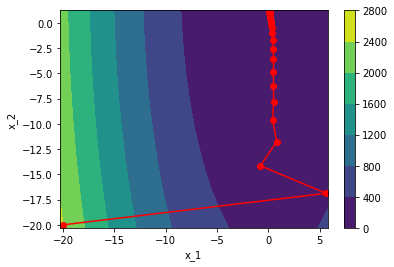

Stepsize = 0.125, Num iterations 63, Final x: [0.11246751 1.12466849], Final objective value: 1.9697


In [13]:
eta= 1/8
x0 = np.array([-20,-20])
x_array, num_iters = gradient_descent(gradient2, x = x0, stepsize=eta, max_iters=1000)

visualize(x_array, f2, watch_path=False)

x_grad2 = x_array
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f2(x_array[-1]).round(4)))

### TODO: Did it converge? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">It converged in around 65 iterations to a value of ~2.4. Since gradient descent is a first order method, it isn't affected by the extra term in this versus the quadratic from before. Neither are linear, so it can't take advantage of any structure.

### 2b. Newton's method in action
Suppose you start with $x_0 = [20,20]$. 

### TODO: Run Newton's method using stepsize of $1$ and $\frac{1}{4}$ and plot the trajectory as well as optimal value 

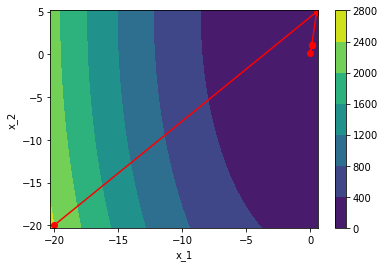

Stepsize = 1.0, Num iterations 5, Final x: [0.11246719 1.12467185], Final objective value: 1.9697


In [14]:
x0 = np.array([-20,-20])
eta = 1.0
x_array, num_iters = Newton(gradient2, Hessian2, x = x0, stepsize = eta, max_iters=1000)

visualize(x_array, f2, watch_path=False)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f2(x_array[-1]).round(4)))

### TODO: Did it converge? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">The algorithm converges in 8 iterations (and not 1 iteration) when using stepsize of 1.0. This is because the objective function is not a quadrratic.

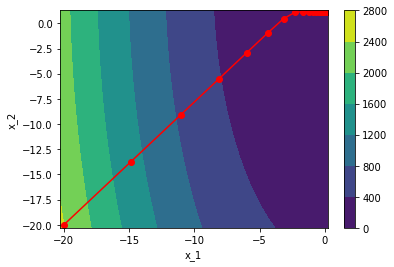

Stepsize = 0.25, Num iterations 54, Final x: [0.11246473 1.12467152], Final objective value: 1.9697


In [15]:
x0 = np.array([-20,-20])
eta = 1.0/4.0
x_array, num_iters = Newton(gradient2, Hessian2, x = x0, stepsize = eta, max_iters=1000)

visualize(x_array, f2, watch_path=False)
x_newton2 = x_array
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f2(x_array[-1]).round(4)))

### TODO: Did it converge? If so, how many steps it take? How fast did it converge in the $x_1$ and $x_2$ directions, respectively?

<span style="color:red">The algorithm converges in around 55 iterations when using stepsize of 0.25. This is because we aren't overshooting like we did before.

### 2c. Compare the paths taken by gradient descent with stepsize 1/8 and Newton's method with stepsize 1/4

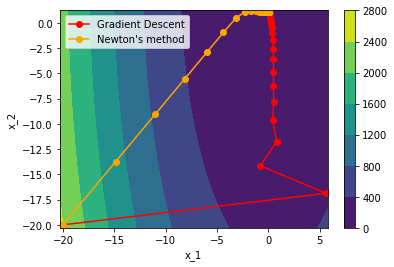

In [16]:
visualize_comparison(x_grad2, x_newton2, f2, watch_path=False)

### TODO: Compare the methods. How did they differ in their descent paths? Why do you think that is?

<span style="color:red">Newton's method begins by taking a straight path, efficiently minimizing wrt both $x$ and $y$, whereas gradient descent takes its time first converging in $x$ then $y$. As we can see, Newton's method is definitely more appropriate as it is a more robust method, getting us to the optimal value in less iterations. However, the caveat to Newton's method is that the Hessian is often expensive to compute. If it will slow us down to do this first, then we might as well just stick with gradient descent in certain situations.

Feel free to play around with stepsizes for gradient descent and Newton's method in the cells above and see when things start to diverge and how the paths taken evolve as stepsize changes. 

## Credit: 
Vignesh Subramanian, Spring 2019

Sean Farhat, Spring 2020
